<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Lesson_10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bushra Hoteit

Github link:

**1. Dataset Selection and Preprocessing**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

# Dataset consists of around 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
# Handling missing values

print(f"Missing values:\n{df.isnull().sum()}")


Missing values:
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [6]:
df.dropna(subset=['verified_reviews'], inplace=True)

In [7]:
print(f"Missing values after handling:\n{df.isnull().sum()}")

Missing values after handling:
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [8]:
# Dropping the date & rating columns as they will not be needed
df = df.drop(['date', 'rating'], axis=1)

In [9]:
# Feature scaling not needed

In [10]:
# One-hot encoding for categorical variables (if applicable)

# Creating binary numerical columns for the categorical variable 'variation' & dropping the original column
df = pd.get_dummies(df, columns=['variation'], drop_first=True)

df.head()

,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [11]:
# Apply any necessary transformations and normalize or standardize the data as required for your algorithms.

# Not needed

**2. Feature Engineering**

***Transform preprocessed text data into a numerical format that can be fed into NLP models.***

In [12]:
# Tokenization
# Split the text into individual tokens (words).

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Fit and transform the 'verified_reviews' column
X_counts = vectorizer.fit_transform(df['verified_reviews'])

In [13]:
# Print the shape of the resulting matrix (num_samples x num_features)
print("Shape of CountVectorizer matrix:", X_counts.shape)


Shape of CountVectorizer matrix: (3149, 4044)


In [14]:
# Print the dense array representation of the matrix

print(X_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


***Text Vectorization Methods***

*Bag of Words (BoW)*

In [15]:
# Represents text by counting word occurrences.

from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(df['verified_reviews'])


*TF-IDF (Term Frequency-Inverse Document Frequency)*

In [16]:
# Weighs word counts by how important the word is (less weight for common words)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['verified_reviews'])


*Word Embeddings (Advanced NLP)*

In [17]:
# Maps words to dense vectors capturing semantic meaning.
!python -m spacy download en_core_web_md

import spacy
nlp = spacy.load("en_core_web_md")

# Use top frequent words from reviews

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(df['verified_reviews'])

top_words = vectorizer.get_feature_names_out()

# Get word vectors
word_vectors = [nlp(word).vector for word in top_words]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 25.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


***Visualize word embeddings to explore semantic relationships between words (using t-SNE or PCA for dimensionality reduction).***

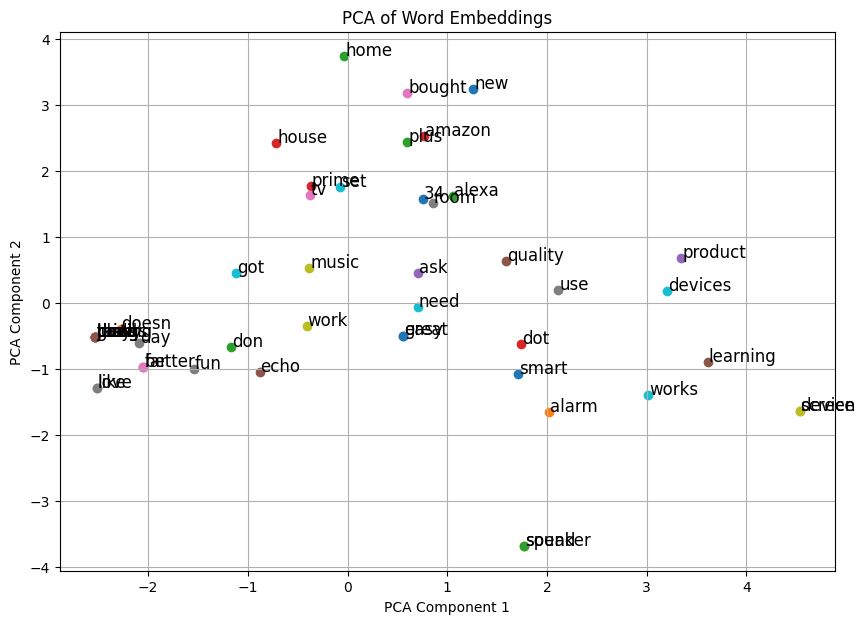

In [18]:
# Visualize Word Embeddings with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 7))
for i, word in enumerate(top_words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, word, fontsize=12)
plt.title("PCA of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



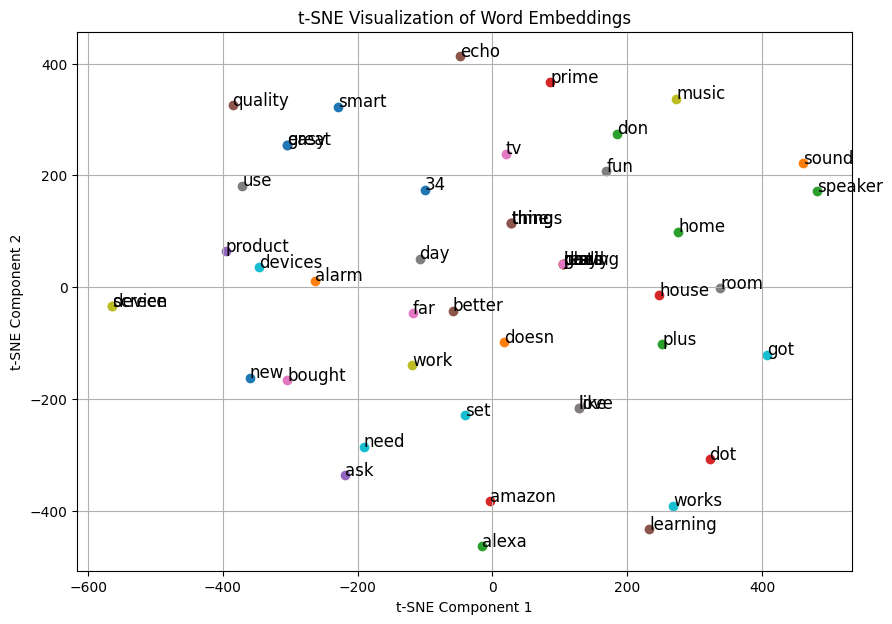

In [19]:
# Visualize Word Embeddings with t-SNE

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the list of word vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(word_vectors_array)

# Plot the 2D t-SNE result
plt.figure(figsize=(10, 7))
for i, word in enumerate(top_words):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.text(tsne_result[i, 0] + 0.01, tsne_result[i, 1] + 0.01, word, fontsize=12)

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

**3. Text Classification Using Traditional Models**

*Implement traditional machine learning models to classify text data.*

*Train at least two traditional classifiers (e.g., Logistic Regression, Support Vector Machines) using the vectorized data.*

*Optimize model parameters using grid search with cross-validation.*

In [20]:
from sklearn.model_selection import train_test_split

X = X_counts               # vectorized text data (features)
y = df['feedback']         # target labels (e.g., 'positive' or 'negative')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Set up classifiers and grid search parameters

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)

# SVM
svm = SVC()

# Parameter grids for Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10],       # Regularization strength
    'solver': ['liblinear']  # good for small-medium datasets
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # linear and RBF kernels
    'gamma': ['scale', 'auto']    # kernel coefficient
}


In [22]:
# Performing Grid Search with Cross-Validation for both models
# Logistic Regression Grid Search

grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# SVM Grid Search
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


**4. Sentiment Analysis Using a Large Language Model**

***Utilize a pre-trained Large Language Model for sentiment analysis.***

In [23]:
pip install transformers datasets torch


In [24]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

texts = df['verified_reviews'].tolist()

encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)



In [25]:
# Create a PyTorch Dataset class
import torch

# Define labels
labels = df['feedback'].tolist()

# Define dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset
dataset = SentimentDataset(encodings, labels)


In [26]:
# Load pre-trained BERT for sequence classification

from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# Prepare DataLoader for training
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=16, shuffle=True)


In [28]:
# Set up optimizer and training loop
from torch.optim import AdamW
from tqdm import tqdm
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

model.train()

for epoch in range(3):  # number of epochs
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())



Epoch 2: 100%|██████████| 197/197 [43:54<00:00, 13.37s/it, loss=0.00604]


**5. Model Evaluation**

***Assess the performance of the implemented models.***

***Evaluate the models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.***

In [29]:
# Evaluating both models on test data

# Logistic Regression predictions
y_pred_lr = grid_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# SVM predictions
y_pred_svm = grid_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.926984126984127
              precision    recall  f1-score   support

           0       0.74      0.41      0.53        63
           1       0.94      0.98      0.96       567

    accuracy                           0.93       630
   macro avg       0.84      0.70      0.75       630
weighted avg       0.92      0.93      0.92       630

SVM Accuracy: 0.9222222222222223
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        63
           1       0.95      0.97      0.96       567

    accuracy                           0.92       630
   macro avg       0.79      0.74      0.76       630
weighted avg       0.92      0.92      0.92       630



***Create confusion matrices and ROC curves to visualize performance outcomes.***

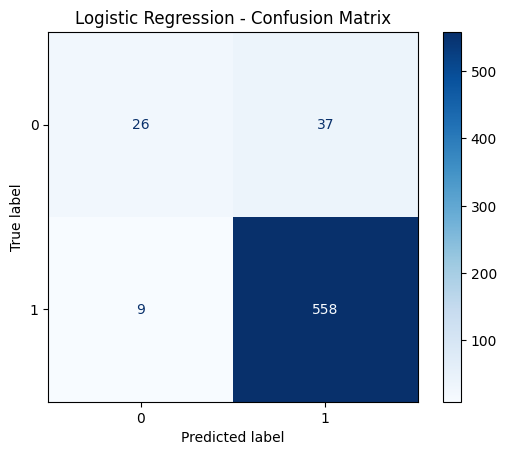

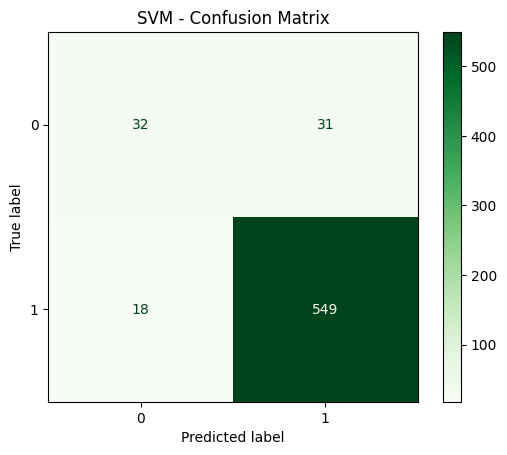

In [30]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Confusion Matrix for SVM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.show()


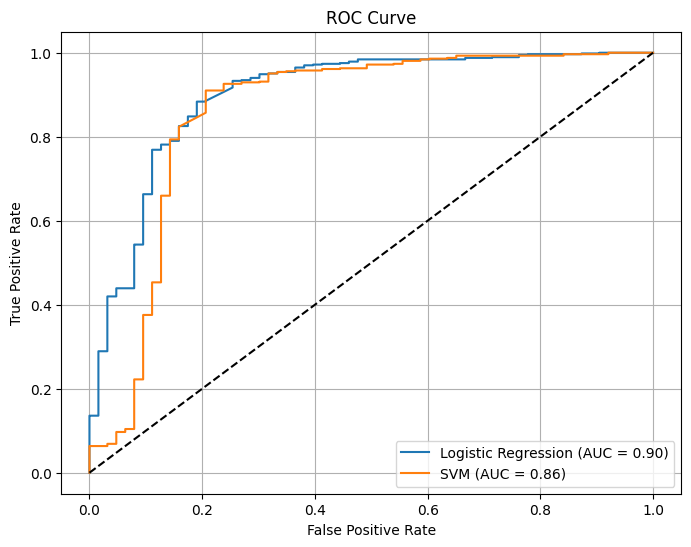

In [31]:
# ROC curves

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_scores_lr = grid_lr.predict_proba(X_test)[:, 1]
y_scores_svm = grid_svm.decision_function(X_test)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_scores_lr):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_scores_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
